In [152]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin as pg
from matplotlib_venn import venn2, venn2_circles
from collections import namedtuple

In [70]:
prefix = '/mnt/c/Users/David/Documents/Data/Classes/pseuSal_aln_final/salmon/'

data = pd.read_csv(f"{prefix}salmon.merged.gene_counts.tsv", sep= '\t')

data = data.drop(['gene_id'], axis = 1).set_index('gene_name')

data_meta = pd.DataFrame([['Tonsil_Donor_1-GCB_001', 'GCB'],  ['Tonsil_Donor_1-GCTFH_001', 'Tfh'],['Tonsil_Donor_1-TREG_001','Treg'],
                          ['Tonsil_Donor_2-GCB_002', 'GCB'],  ['Tonsil_Donor_2-GCTFH_002', 'Tfh'],['Tonsil_Donor_2-TREG_002','Treg'],
                          ['Tonsil_Donor_3-GCB_003', 'GCB'],  ['Tonsil_Donor_3-GCTFH_003', 'Tfh'],['Tonsil-Donor_3-TREG_003','Treg']
                          ], columns=['Donor', 'Cell Type'])

data_meta
#data_noReg = data.drop(['Tonsil_Donor_1-TREG_001','Tonsil_Donor_2-TREG_002','Tonsil-Donor_3-TREG_003'])

,Donor,Cell Type
0,Tonsil_Donor_1-GCB_001,GCB
1,Tonsil_Donor_1-GCTFH_001,Tfh
2,Tonsil_Donor_1-TREG_001,Treg
3,Tonsil_Donor_2-GCB_002,GCB
4,Tonsil_Donor_2-GCTFH_002,Tfh
5,Tonsil_Donor_2-TREG_002,Treg
6,Tonsil_Donor_3-GCB_003,GCB
7,Tonsil_Donor_3-GCTFH_003,Tfh
8,Tonsil-Donor_3-TREG_003,Treg


<Axes: ylabel='Count'>

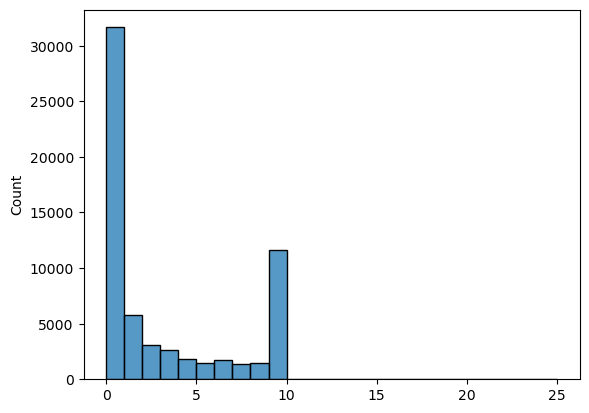

In [71]:
data_count = (data>0).sum(axis=1)

sns.histplot(data_count, bins= np.arange(26), stat='count')


In [ ]:
data_clean = data.loc[data_count >= 4]
data_clean = data_clean[~data_clean.index.duplicated(keep='first')]
data_mean = data_clean.mean(axis=1)
#data_clean = data_clean - data_clean.mean() / data_clean.std()
print(f'All genes: {len(data)},\nExpressed genes: {len(data_clean)}')
type(data_mean)
data_mean_sort = data_mean.sort_values(ascending=False)
top40 = data_mean_sort.head(50)

high_expression=data_clean.merge(top40.rename('high_expression'), left_index=True, right_index=True,how='inner')
high_expression = high_expression.drop(['high_expression'], axis=1)


All genes: 62709,
Expressed genes: 19466


,Tonsil_Donor_1-GCB_001,Tonsil_Donor_1-GCTFH_001,Tonsil_Donor_1-TREG_001,Tonsil_Donor_2-GCB_002,Tonsil_Donor_2-GCTFH_002,Tonsil_Donor_2-TREG_002,Tonsil_Donor_3-GCB_003,Tonsil_Donor_3-GCTFH_003,Tonsil-Donor_3-TREG_003
gene_name,,,,,,,,,
CD74,150476.836,10307.000,7867.002,127612.181,7176.000,11746.001,138877.678,10891.000,8575.198
KLF6,9540.001,12931.001,18889.702,11330.947,17301.999,29534.786,8242.998,14199.647,16091.001
ACTB,346019.093,341511.552,236059.919,328979.310,286801.657,229884.353,335514.275,245053.069,125300.481
PTPRC,15386.975,37699.982,24473.001,17144.123,33257.975,23648.763,18079.999,30629.750,11446.581
RGS1,23959.000,5395.999,27153.989,13083.000,5876.000,41305.998,13598.001,6499.000,17699.997
EZR,40685.890,12033.000,8616.221,33160.151,12199.958,9619.758,32109.367,10418.000,4222.000
RPL3,14040.000,21071.483,20607.298,13798.444,17001.988,27350.509,18142.996,17095.369,16433.941
CORO1A,34057.155,13658.139,17959.701,32937.378,13953.458,19112.023,30963.865,12131.989,11617.316
PFN1,17511.991,28531.424,14579.969,18151.878,22517.964,15001.938,23468.974,22868.763,10752.897


In [168]:
gcb_list = ['Tonsil_Donor_1-GCB_001','Tonsil_Donor_2-GCB_002','Tonsil_Donor_3-GCB_003']
gctfh_list = ['Tonsil_Donor_1-GCTFH_001','Tonsil_Donor_2-GCTFH_002','Tonsil_Donor_3-GCTFH_003']
treg_list = ['Tonsil_Donor_1-TREG_001','Tonsil_Donor_2-TREG_002','Tonsil-Donor_3-TREG_003']

gcb = data_clean[gcb_list]
gctfh = data_clean[gctfh_list]
treg = data_clean[treg_list]

hi_gcb = high_expression[gcb_list]
hi_gctfh = high_expression[gctfh_list]
hi_treg = high_expression[treg_list]

(Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2'))

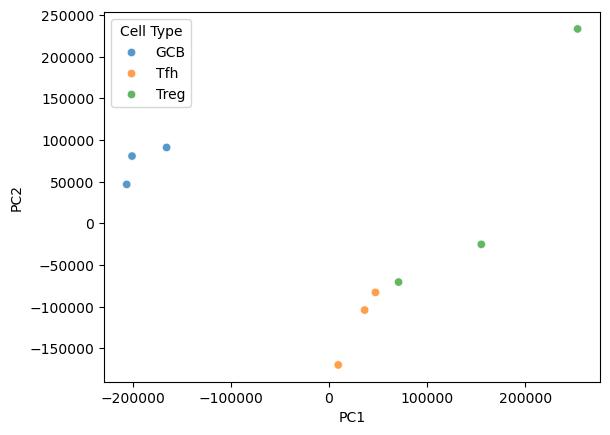

In [74]:
reduced = PCA(n_components=2).fit_transform(data_clean.T)
ax = sns.scatterplot(x = reduced[:,0], y = reduced[:, 1],hue=data_meta['Cell Type'], alpha=0.75)
ax.set_xlabel('PC1'), ax.set_ylabel('PC2')


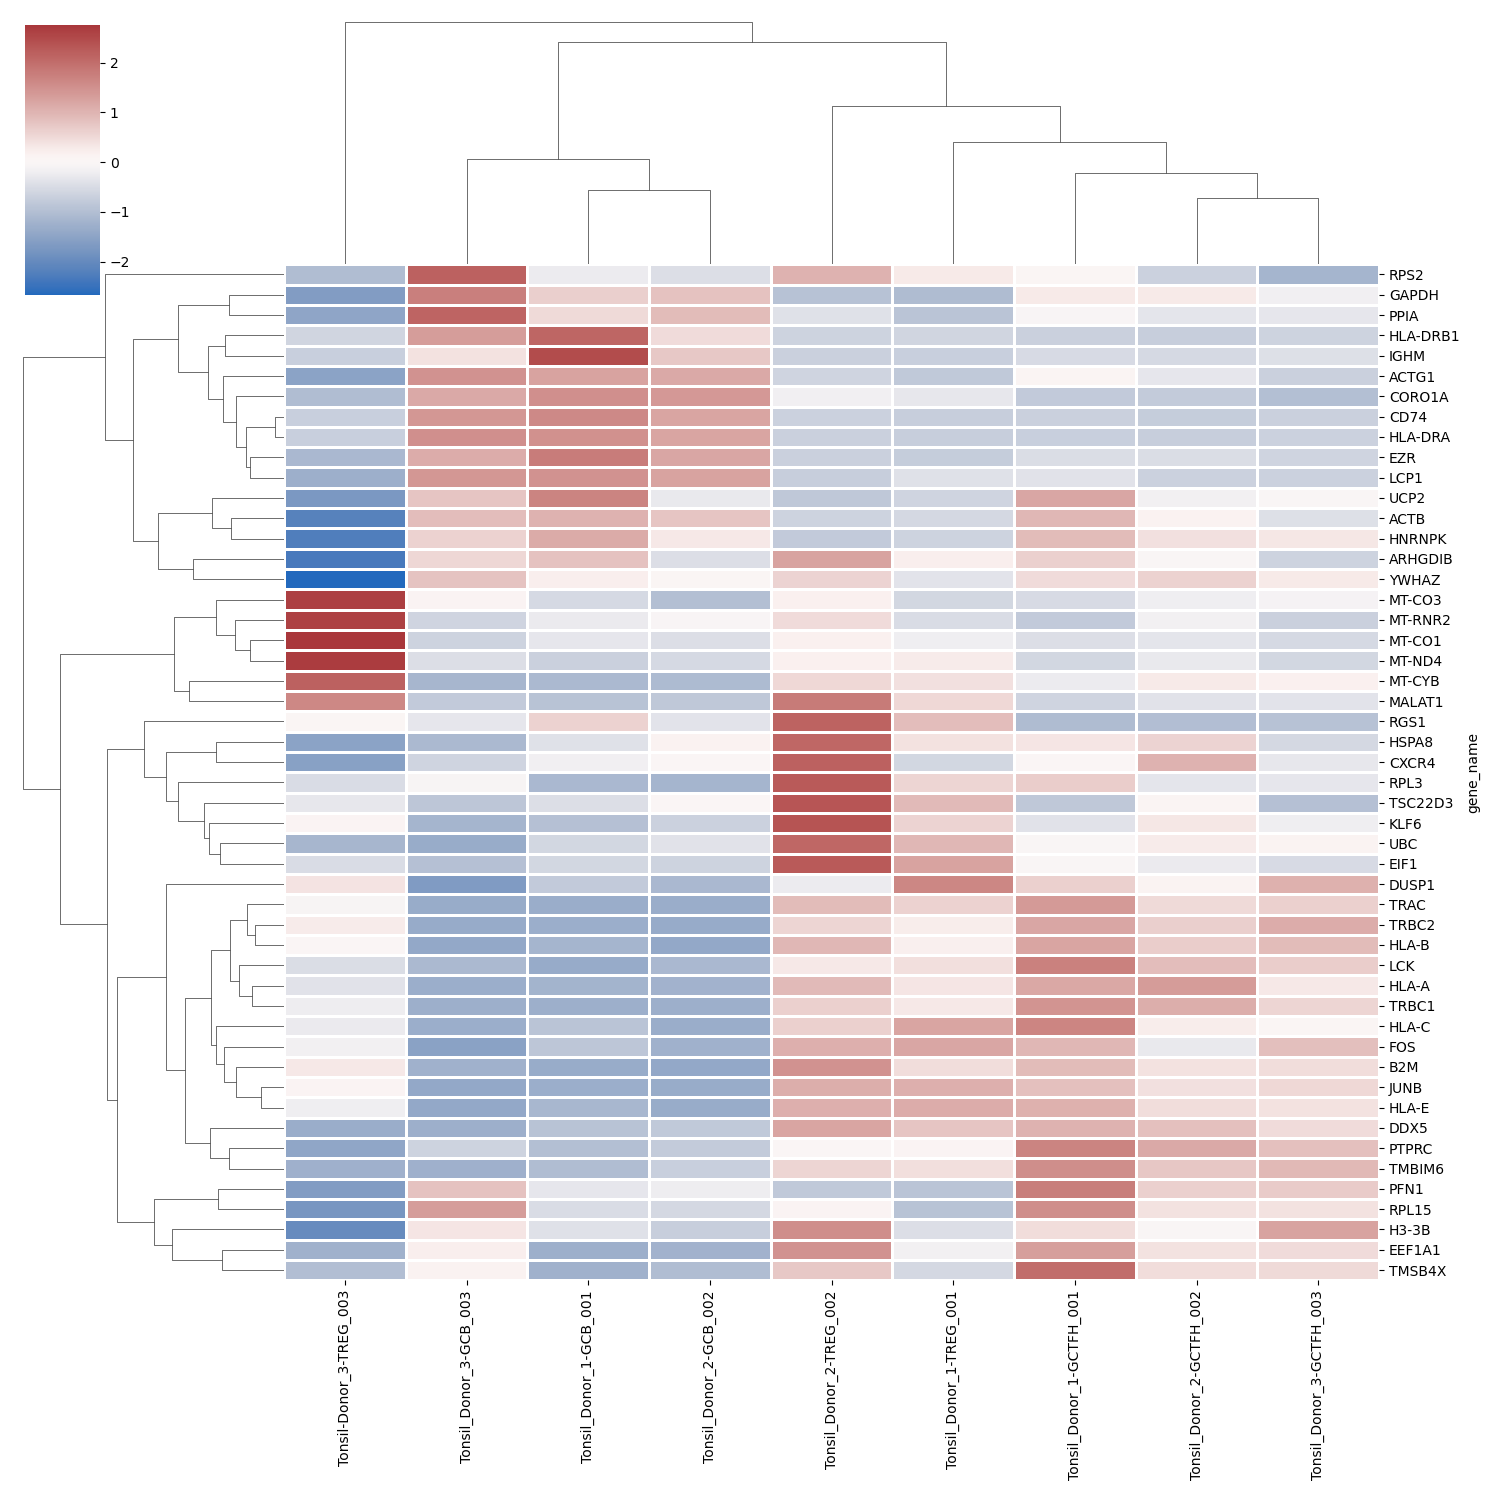

In [75]:

scaler = skl.preprocessing.StandardScaler()
transform_high_exp = high_expression.T
high_expression_0 = transform_high_exp.apply(sp.stats.zscore)

sns.clustermap(high_expression_0.T, 
               cmap="vlag",
               linewidths=.75,
               figsize=(15, 15)
               )


In [169]:
#
L2_FC_gctfh = np.log2(gctfh.mean(axis=1) / gcb.mean(axis=1))
L2_FC_treg = np.log2(treg.mean(axis=1) / gcb.mean(axis=1))

hi_L2_FC_gctfh = np.log2(hi_gctfh.mean(axis=1) / hi_gcb.mean(axis=1))
hi_L2_FC_treg = np.log2(hi_treg.mean(axis=1) / hi_gcb.mean(axis=1))

/home/djoyner4/miniforge3/envs/rapids-24.10/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/djoyner4/miniforge3/envs/rapids-24.10/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [172]:
_, pvals = sp.stats.ttest_ind(gctfh, gcb, axis=1)
pval_ser = pd.Series(pvals, index=data_clean.index)

_, bh_pval = pg.multicomp(pval_ser, alpha=0.05, method='fdr_bh')

##
_, tr_pvals = sp.stats.ttest_ind(treg, gcb, axis=1)
tr_pval_ser = pd.Series(tr_pvals, index=data_clean.index)

_, tr_bh_pval = pg.multicomp(tr_pval_ser, alpha=0.05, method='fdr_bh')



/home/djoyner4/miniforge3/envs/rapids-24.10/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:605: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [176]:
_, hi_tfh_pvals = sp.stats.ttest_ind(hi_gctfh, hi_gcb, axis=1)
hi_tfh_pval_ser = pd.Series(hi_tfh_pvals, index=high_expression.index)

_, hi_tfh_bh_pval = pg.multicomp(hi_tfh_pval_ser, alpha=0.05, method='fdr_bh')

_, hi_treg_pvals = sp.stats.ttest_ind(hi_treg, hi_gcb, axis=1)
hi_treg_pval_ser = pd.Series(hi_treg_pvals, index=high_expression.index)

_, hi_treg_bh_pval = pg.multicomp(hi_treg_pval_ser, alpha=0.05, method='fdr_bh')

In [174]:
gctfh_fc = pd.DataFrame({
    'log2FC':L2_FC_gctfh,
    'pvals':pvals,
    'bh_pval':bh_pval,
    'mean_expression': data_clean[gctfh_list + gcb_list].mean(axis=1)
    })
gctfh_fc.head()

hi_gctfh_fc = pd.DataFrame({
    'log2FC':hi_L2_FC_gctfh,
    'pvals':hi_tfh_pvals,
    'bh_pval':hi_tfh_bh_pval,
    'mean_expression': high_expression[gctfh_list + gcb_list].mean(axis=1)
    })
hi_gctfh_fc.head()



,log2FC,pvals,bh_pval,mean_expression
gene_name,,,,
CD74,-3.877291,0.000042,0.000892,74223.449167
KLF6,0.609910,0.031736,0.063472,12257.765500
ACTB,-0.210429,0.182340,0.253250,313979.826000
PTPRC,1.005200,0.001537,0.005488,25366.467333
RGS1,-1.510753,0.036923,0.071006,11401.833333


In [177]:
treg_fc = pd.DataFrame({
    'log2FC':L2_FC_treg,
    'pvals':tr_pvals,
    'bh_pval':tr_bh_pval,
    'mean_expression': data_clean[treg_list + gcb_list].mean(axis=1)
    })
treg_fc.head()

hi_treg_fc = pd.DataFrame({
    'log2FC':hi_L2_FC_treg,
    'pvals':hi_treg_pvals,
    'bh_pval':hi_treg_bh_pval,
    'mean_expression': high_expression[treg_list + treg_list].mean(axis=1)
    })
hi_treg_fc.head()

,log2FC,pvals,bh_pval,mean_expression
gene_name,,,,
CD74,-3.886769,0.000042,0.001058,9396.067000
KLF6,1.147935,0.048071,0.089021,21505.163000
ACTB,-0.773260,0.018262,0.044497,197081.584333
PTPRC,0.235092,0.524290,0.584371,19856.115000
RGS1,0.766741,0.199894,0.285563,28719.994667


In [178]:
print(gctfh_fc[gctfh_fc.index.duplicated()].head(60))

Empty DataFrame
Columns: [log2FC, pvals, bh_pval, mean_expression]
Index: []


              log2FC     pvals   bh_pval  mean_expression
gene_name                                                
B2M         2.506066  0.000325  0.002033     78206.070667
JUNB        3.522885  0.000123  0.001231     17149.556667
HLA-E       2.038750  0.001020  0.004638     30692.639500
HLA-A       3.340649  0.002485  0.007135     49096.007000
TRBC1      10.725048  0.000840  0.004638     15467.046833
TRBC2       5.692488  0.000164  0.001364     19251.261167
TRAC        3.929496  0.001353  0.005202     12859.609333
             log2FC     pvals   bh_pval  mean_expression
gene_name                                               
CD74      -3.877291  0.000042  0.000892     74223.449167
HLA-DRB1  -5.079863  0.013792  0.031346     19470.383500
HLA-DRA   -5.239949  0.000032  0.000892     26099.500000


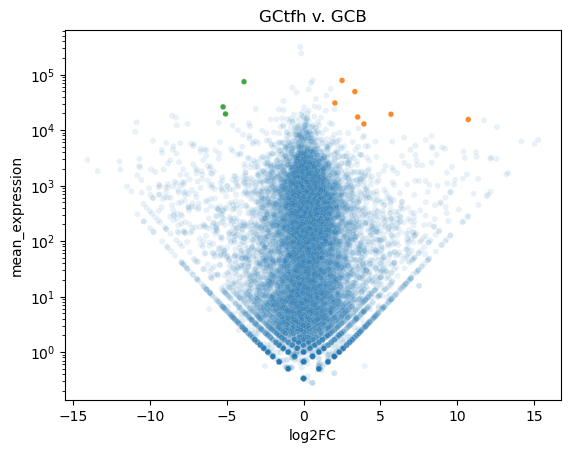

In [183]:
sig_gctfh_fc = hi_gctfh_fc[hi_gctfh_fc['bh_pval']<0.05]
sig_gctfh_fc_pos = sig_gctfh_fc[sig_gctfh_fc['log2FC']>2]
sig_gctfh_fc_neg = sig_gctfh_fc[sig_gctfh_fc['log2FC']<-2]

ax = sns.scatterplot(data = gctfh_fc,
                y = 'mean_expression',
                x = 'log2FC',
                alpha=0.1, size=0.25)
sns.scatterplot(data = sig_gctfh_fc_pos,
                y = 'mean_expression',
                x = 'log2FC', alpha=0.9, size=0.25)
sns.scatterplot(data = sig_gctfh_fc_neg,
                y = 'mean_expression',
                x = 'log2FC', alpha=0.9, size=0.25)
ax.set_yscale('log')
ax.set_title('GCtfh v. GCB')
ax.legend([],[], frameon=False)

print(sig_gctfh_fc_pos)
print(sig_gctfh_fc_neg)

              log2FC     pvals   bh_pval  mean_expression
gene_name                                                
B2M         2.604207  0.005052  0.019430    142361.851333
JUNB        3.629648  0.002761  0.017349     33977.649333
HLA-E       2.059162  0.010939  0.036462     50073.356000
HLA-A       2.890981  0.016516  0.043463     65437.883333
TRBC1      10.111842  0.003835  0.019175     20210.976333
TRBC2       5.245646  0.000080  0.001337     27711.405667
MALAT1      2.214153  0.005748  0.020527     93850.697333
TRAC        3.688288  0.003469  0.019175     20419.277000
             log2FC     pvals   bh_pval  mean_expression
gene_name                                               
CD74      -3.886769  0.000042  0.001058      9396.067000
EZR       -2.238157  0.000927  0.011391      7485.993000
HLA-DRB1  -4.011466  0.015410  0.043463      2345.191333
HLA-DRA   -5.713702  0.000029  0.001058       969.000000


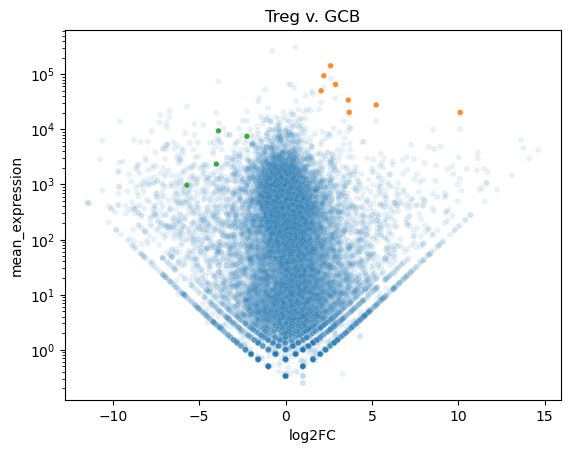

In [184]:
sig_treg_fc = hi_treg_fc[hi_treg_fc['bh_pval']<0.05]
sig_treg_fc_pos = sig_treg_fc[sig_treg_fc['log2FC']>2]
sig_treg_fc_neg = sig_treg_fc[sig_treg_fc['log2FC']<-2]

ax = sns.scatterplot(data = treg_fc,
                y = 'mean_expression',
                x = 'log2FC',
                alpha=0.1, size=0.25)
sns.scatterplot(data = sig_treg_fc_pos,
                y = 'mean_expression',
                x = 'log2FC', alpha=0.9, size=0.25)
sns.scatterplot(data = sig_treg_fc_neg,
                y = 'mean_expression',
                x = 'log2FC', alpha=0.9, size=0.25)
ax.set_yscale('log')
ax.set_title('Treg v. GCB')
ax.legend([],[], frameon=False)


sig_treg_fc.head
print(sig_treg_fc_pos)
print(sig_treg_fc_neg)

In [160]:
sig_gctfh_names = [sig_gctfh_fc.reset_index()['gene_name']]
sig_treg_names = [sig_treg_fc.reset_index()['gene_name']]

type(sig_gctfh_names)
type(sig_treg_names)


list

In [162]:
set1 = set(sig_gctfh_names)
set2 = set(sig_treg_names)

#s1 = namedtuple("set1", sig_gctfh_names.index)(*sig_gctfh_names)
#s2 = namedtuple("set2", sig_treg_fc.names)(*sig_treg_names)

type(s1)


TypeError: unhashable type: 'Series'

In [147]:
venn2([set1, set2], ('treg/gcb','gctfh/gcb'))
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'list'